### Lab 4
The following code is a Chat-GPT3 generated code.To run the provided code, install 'pgmpy' library by following the instructions in the provided link! Look for installation through anaconda:  https://pgmpy.org/started/install.html

After completeing the installation process, study the tutorial for 'Bayesian Network' class provided in the 'pgmpy' library:  https://pgmpy.org/models/bayesiannetwork.html
This documentation covers the syntax for creating a structure for a Bayesian Network model including adding features and dependencies between the features.

Here is the source code for pgmpy.models.BayesianNetwork: 
https://pgmpy.org/_modules/pgmpy/models/BayesianNetwork.html#BayesianNetwork.add_edge

---

#### Part 1 
Use the following table and revise the probability values in the code below and include a conditional probability table based on the variables in this problem. Then Based on the structure of the model, provide the visualized Bayesian Network corresponding to the edges (i.e., dependencies) and the features (i.e., evidence).
In your computations, assume that:
- P(grades=A) = 0.2, P(grades=B) = 0.4 , P(grades=C)=0.4
- P(diff=easy)=0.5, P(diff=medium)=0.1, P(diff=hard)=0.5
- P(aptitude=low)=0.3, P(aptitude=medium) = 0.4, P(aptitude=high) = 0.3

![Generated Dataset](./lab4-cpt.jpg)

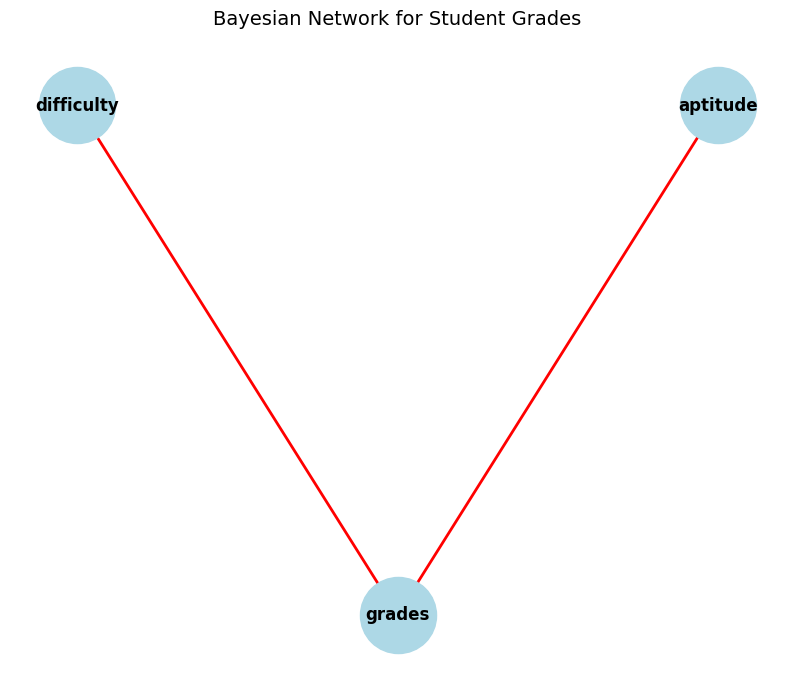


Conditional Probability Tables:

P(Difficulty):
[0.5 0.5]

P(Aptitude):
[0.3 0.4 0.3]

P(Grades | Difficulty, Aptitude):
Format: [P(A), P(B), P(C)] for each combination of (Difficulty, Aptitude)
[[0.1  0.2  0.5  0.05 0.1  0.3 ]
 [0.2  0.3  0.3  0.15 0.2  0.4 ]
 [0.7  0.5  0.2  0.8  0.7  0.3 ]]


In [8]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

student = BayesianNetwork([('diff', 'grades'), ('aptitude', 'grades')])

difficulty_cpd = TabularCPD('diff', 2, [[.5], [.5]],
                        state_names={'diff': ['easy', 'hard']})

aptitude_cpd = TabularCPD('aptitude', 3, [[.3], [.4], [.3]],
                        state_names={'aptitude': ['low', 'medium', 'high']})


student = BayesianNetwork([('diff', 'grades'), ('aptitude', 'grades')])
grades_cpd = TabularCPD('grades', 3, [[0.10,0.20,0.50,0.05,0.10,0.30],
                                      [0.20,0.30,0.30,0.15,0.20,0.40],
                                      [0.70,0.50,0.20,0.80,0.70,0.30]],
                        evidence=['diff', 'aptitude'], evidence_card=[2, 3],
                        state_names={'grades': ['gradeA', 'gradeB', 'gradeC'],
                                     'diff': ['easy', 'hard'],
                                     'aptitude': ['low', 'medium', 'high']})


student.add_cpds(difficulty_cpd, aptitude_cpd, grades_cpd)

plt.figure(figsize=(10, 8))
graph = nx.DiGraph()
graph.add_edges_from([('difficulty', 'grades'), ('aptitude', 'grades')])

pos = {
    'difficulty': (-1, 0),
    'aptitude': (1, 0),
    'grades': (0, -1)
}

nx.draw_networkx_nodes(graph, pos, node_color='lightblue', 
                      node_size=3000, node_shape='o')
nx.draw_networkx_edges(graph, pos, edge_color='red', 
                      arrowsize=30, width=2)
nx.draw_networkx_labels(graph, pos, font_size=12, font_weight='bold')


plt.title("Bayesian Network for Student Grades", pad=20, fontsize=14)
plt.axis('off')
plt.show()

# tables
print("\nConditional Probability Tables:")
print("\nP(Difficulty):")
print(difficulty_cpd.values.reshape(-1))
print("\nP(Aptitude):")
print(aptitude_cpd.values.reshape(-1))
print("\nP(Grades | Difficulty, Aptitude):")
print("Format: [P(A), P(B), P(C)] for each combination of (Difficulty, Aptitude)")
print(grades_cpd.values.reshape(3, -1))




#### Part 2 
Based on the Bayes Theorem formula used in Bayesian Network classification, and given the conditional probability table above, for each class label, answer the following questions:
- Provide the equation for computing P(grades|diff,aptitude) in terms of the hypothesis and evidence variables. 
- To compute P(grades='gradeA'|diff,aptitude), how many possible combinations of feature values for this class should be estimated? Explain your answer. 
- What is the predicted class label for P(grades|diff='easy',aptitude='high')? Support your answer with your computational work. 
---


**Equation for P(grades|diff,aptitude):**

P(grades|diff,aptitude) = P(grades,diff,aptitude) / P(diff,aptitude)
                       = P(grades) × P(diff|grades) × P(aptitude|grades) / [P(diff) × P(aptitude)]

Note: In our Bayesian Network, we already have P(grades|diff,aptitude) directly in the CPT.

**Number of combinations for P(grades='gradeA'|diff,aptitude):**

Total combinations = 2 (diff values) × 3 (aptitude values) = 6 combinations

All possible combinations:

1. diff='easy',  aptitude='low'
2. diff='easy',  aptitude='medium'
3. diff='easy',  aptitude='high'
4. diff='hard',  aptitude='low'
5. diff='hard',  aptitude='medium'
6. diff='hard',  aptitude='high'


**Predicted class for P(grades|diff='easy',aptitude='high'):**

From the CPT:

P(grades='gradeA'|diff='easy',aptitude='high') = 0.50
P(grades='gradeB'|diff='easy',aptitude='high') = 0.30
P(grades='gradeC'|diff='easy',aptitude='high') = 0.20

Verification from CPT structure:

For column where diff='easy', aptitude='high':
gradeA: 0.50 (50%) ← Highest probability
gradeB: 0.30 (30%)
gradeC: 0.20 (20%)


**Predicted Class Label: 'gradeA'** (since 0.50 is the highest probability)